In [ ]:
pip install gillespy2

In [ ]:
pip install --upgrade pip

In [ ]:
pip install pandas

In [1]:
import gillespy2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.axis import Axis 
from matplotlib.pyplot import figure

**My model**

In [117]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=1.5)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=1.0)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.01)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.001)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1)
    z_plus = gillespy2.Species(name='z_plus', initial_value=0)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=15.0, num_points=51)
    model.timespan(tspan)
    return model

In [118]:
switching_model = switching_process()

In [119]:
%time switching_results= switching_model.run(number_of_trajectories=500)

CPU times: user 108 ms, sys: 444 ms, total: 551 ms
Wall time: 2d 20h 33min 41s


In [120]:
df = pd.DataFrame(switching_results.to_array()[1], columns=['time', 'z_minus', 'z_plus'])
out = df[-1:]
for i in range(1,500):
    df = pd.DataFrame(switching_results.to_array()[i], columns=['time', 'z_minus', 'z_plus'])
    out = pd.concat([out,df[-1:]])

In [ ]:
out

In [121]:
out.to_csv('./1.5_1.0_0.01_0.001_15t_51p.csv')

In [111]:
def switching_process(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=1.0)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=1.5)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.01)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.001)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z_minus = gillespy2.Species(name='z_minus', initial_value=1)
    z_plus = gillespy2.Species(name='z_plus', initial_value=0)
    model.add_species([z_minus, z_plus])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z_minus: 1}, products={z_minus: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z_minus: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z_plus: 1}, products={z_plus: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z_plus: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z_plus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z_minus: 1}, products={z_minus: 1, z_plus: 1}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=15.0, num_points=51)
    model.timespan(tspan)
    return model

In [112]:
switching_model = switching_process()

In [113]:
%time switching_results= switching_model.run(number_of_trajectories=500)

CPU times: user 66.7 ms, sys: 17.8 ms, total: 84.5 ms
Wall time: 32min 51s


In [114]:
df = pd.DataFrame(switching_results.to_array()[1], columns=['time', 'z_minus', 'z_plus'])
out1 = df[-1:]
for i in range(1,500):
    df = pd.DataFrame(switching_results.to_array()[i], columns=['time', 'z_minus', 'z_plus'])
    out1 = pd.concat([out1,df[-1:]])

In [115]:
out1.to_csv('./1.0_1.5_0.01_0.001_15t_51p.csv')

In [7]:
results_avg = switching_results.average_ensemble() 
results_stddev = switching_results.stddev_ensemble()


In [97]:
results_avg['z_plus']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.001,
 0.002,
 0.004,
 0.005,
 0.009,
 0.012,
 0.016,
 0.022,
 0.025,
 0.029,
 0.041,
 0.045,
 0.052,
 0.059,
 0.067,
 0.079,
 0.094,
 0.107,
 0.123,
 0.149,
 0.177,
 0.2,
 0.224,
 0.274,
 0.32,
 0.378,
 0.458,
 0.522,
 0.61,
 0.72,
 0.863,
 1.006,
 1.193,
 1.4,
 1.604,
 1.88,
 2.214,
 2.619,
 3.079,
 3.599,
 4.24,
 4.933,
 5.765,
 6.759,
 7.876,
 9.196,
 10.823,
 12.681,
 14.773,
 17.319,
 20.298,
 23.663,
 27.636,
 32.162,
 37.548,
 43.767,
 51.052,
 59.572,
 69.326,
 80.799,
 93.928,
 109.366,
 127.404,
 148.017,
 172.519,
 200.815,
 233.539,
 271.927,
 316.201]

In [ ]:
fig,ax = plt.subplots(figsize=(14, 12), dpi=300)
plt.plot(results_avg1['time'],results_avg1['z_minus'], '-', color = 'blue', label = 'lambda_min = 1.5')
plt.plot(results_avg2['time'],results_avg2['z_minus'], '-', color = 'red', label = 'lambda_min = 1.2')
plt.grid()
plt.legend()

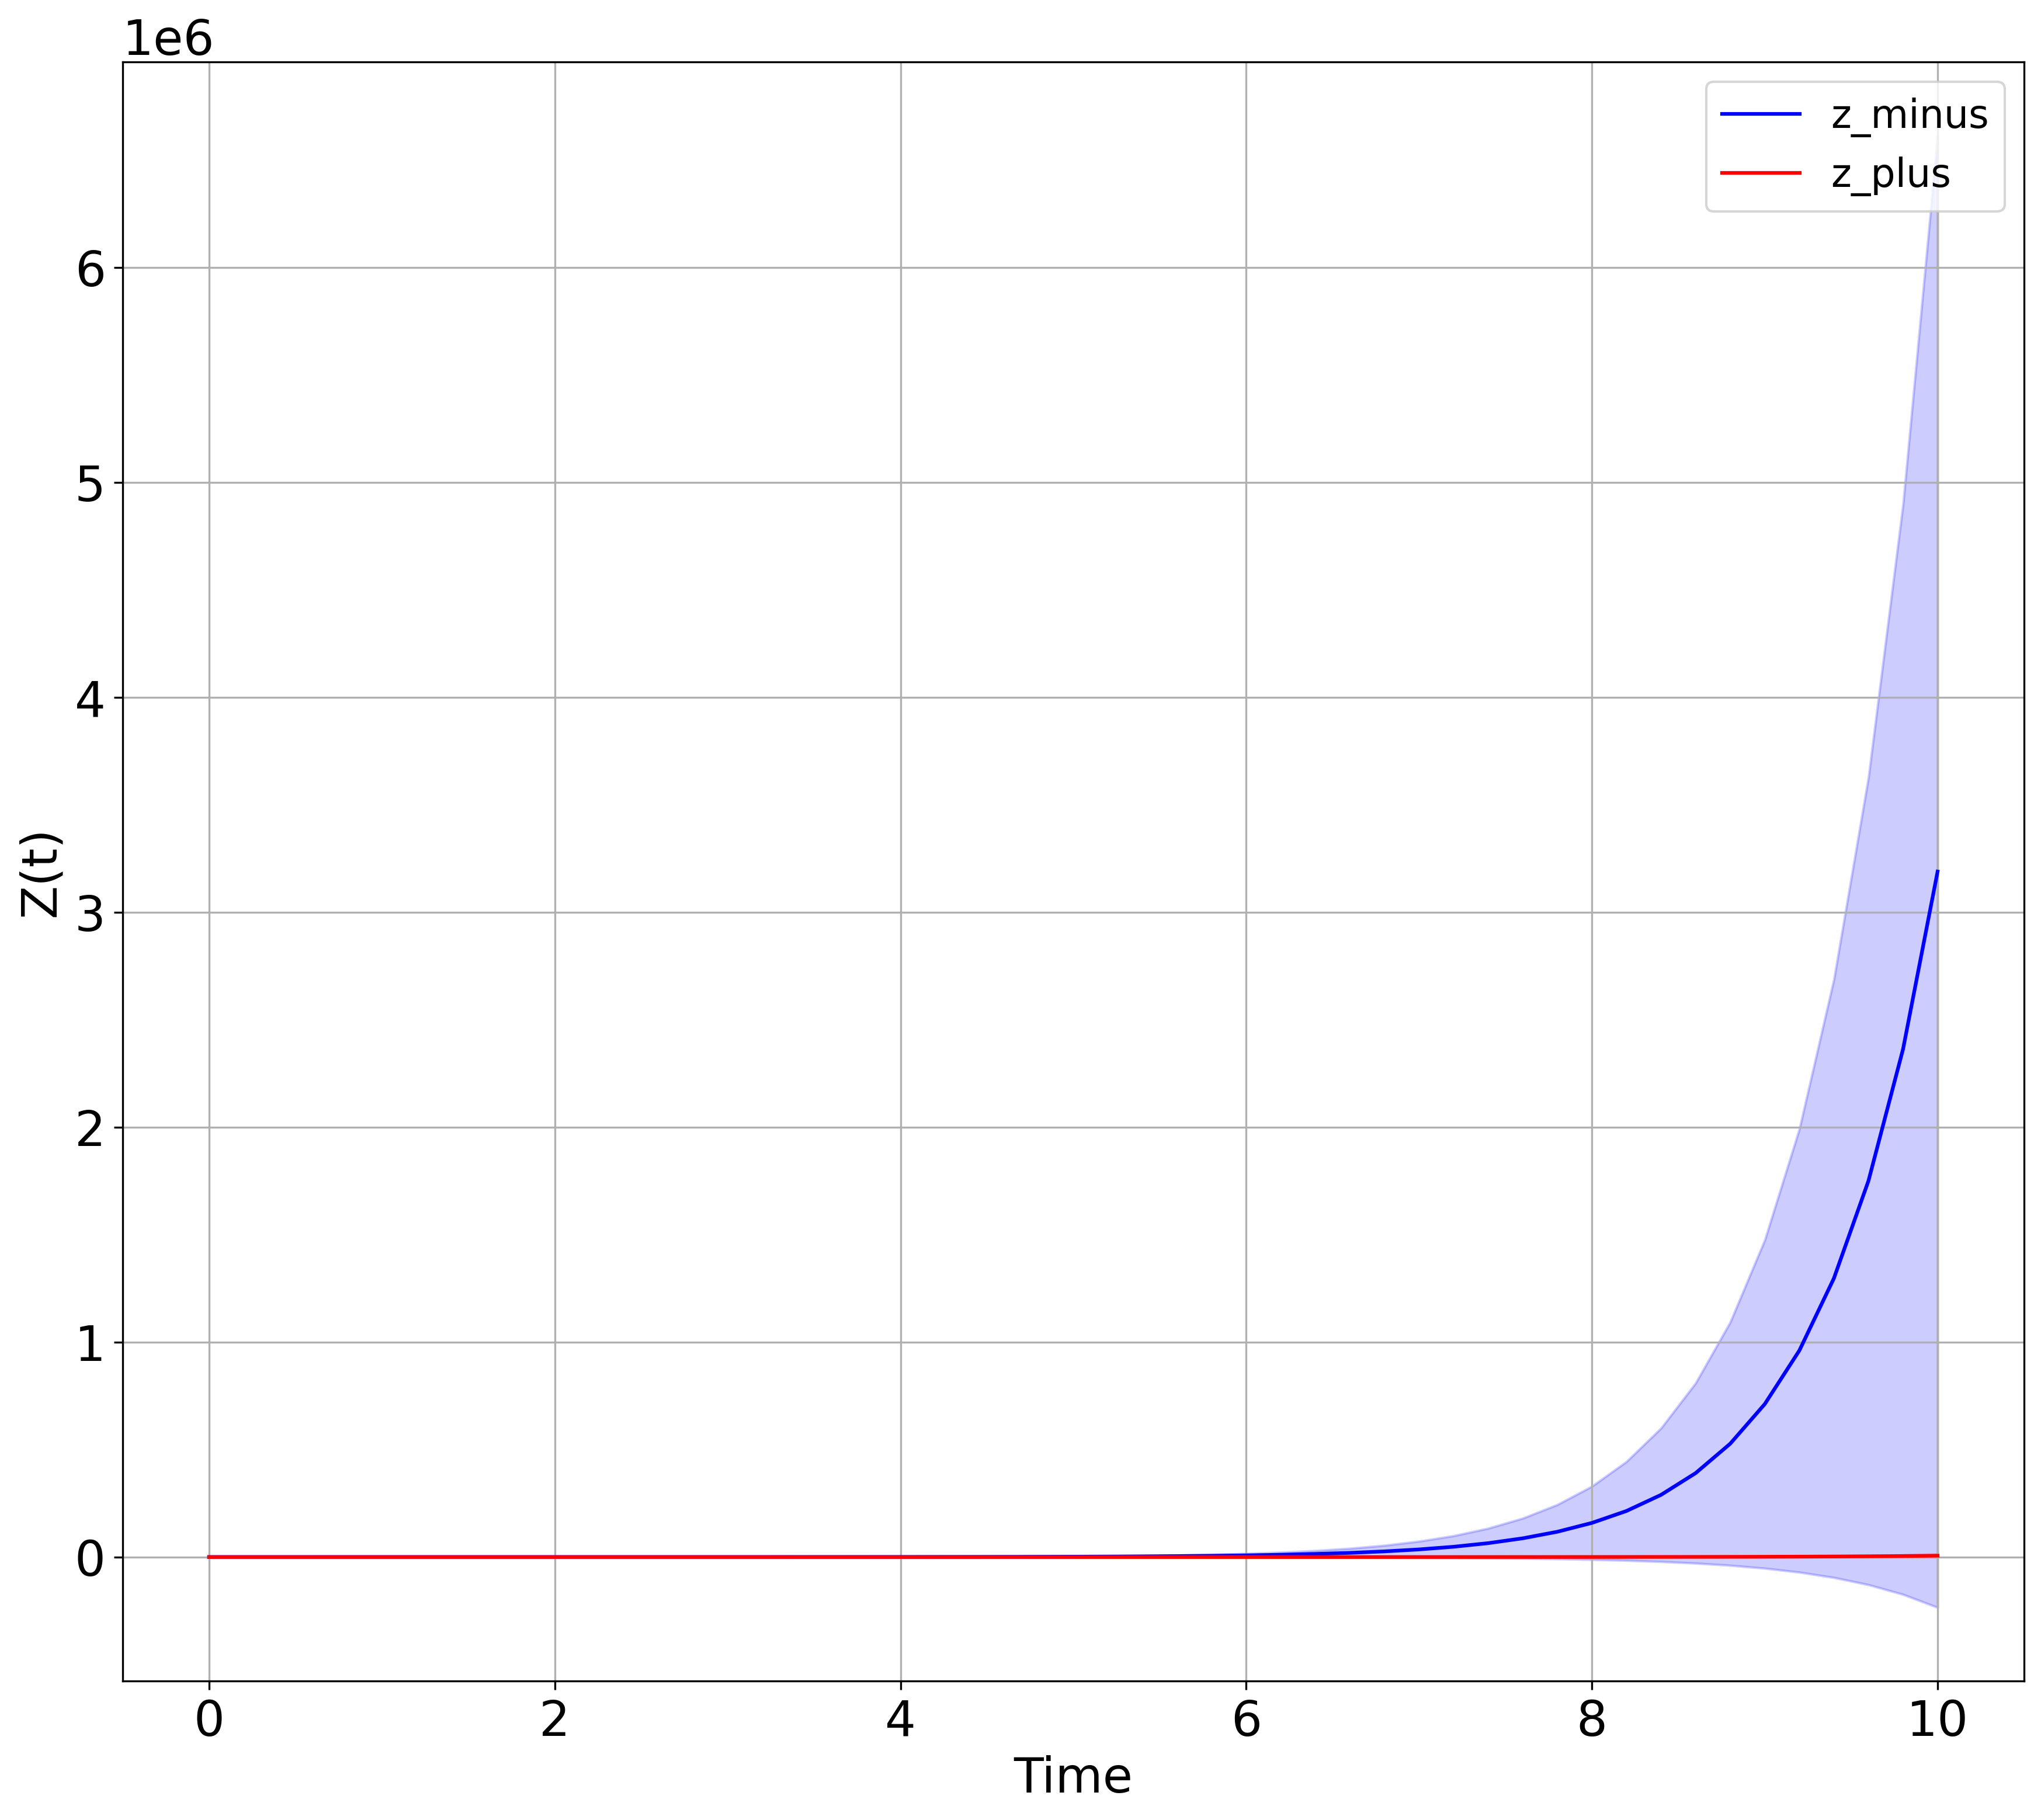

In [9]:
#figure(figsize=(14, 12), dpi=600)
fig,ax = plt.subplots(figsize=(14, 12), dpi=300)
plt.plot(results_avg['time'],results_avg['z_minus'], '-', color = 'blue', label = 'z_minus')
plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'red', label = 'z_plus')
plt.fill_between(results_avg['time'], np.array(results_avg['z_minus']) - np.array(results_stddev['z_minus']), np.array(results_avg['z_minus']) + np.array(results_stddev['z_minus']), color = 'blue', alpha = 0.2)
plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'red', alpha = 0.2)
#plt.title('Z(t) - 1.5_1.2_0.015_0.005', fontsize=20)
ax.yaxis.offsetText.set_fontsize(20)
plt.tick_params(labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Z(t)', fontsize=20)
plt.legend(fontsize=16)
plt.grid()

/var/folders/2p/w6jdykws7gb84c2vkk83ggtr0000gn/T/ipykernel_54189/1588972344.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red', label = 'z_plus')


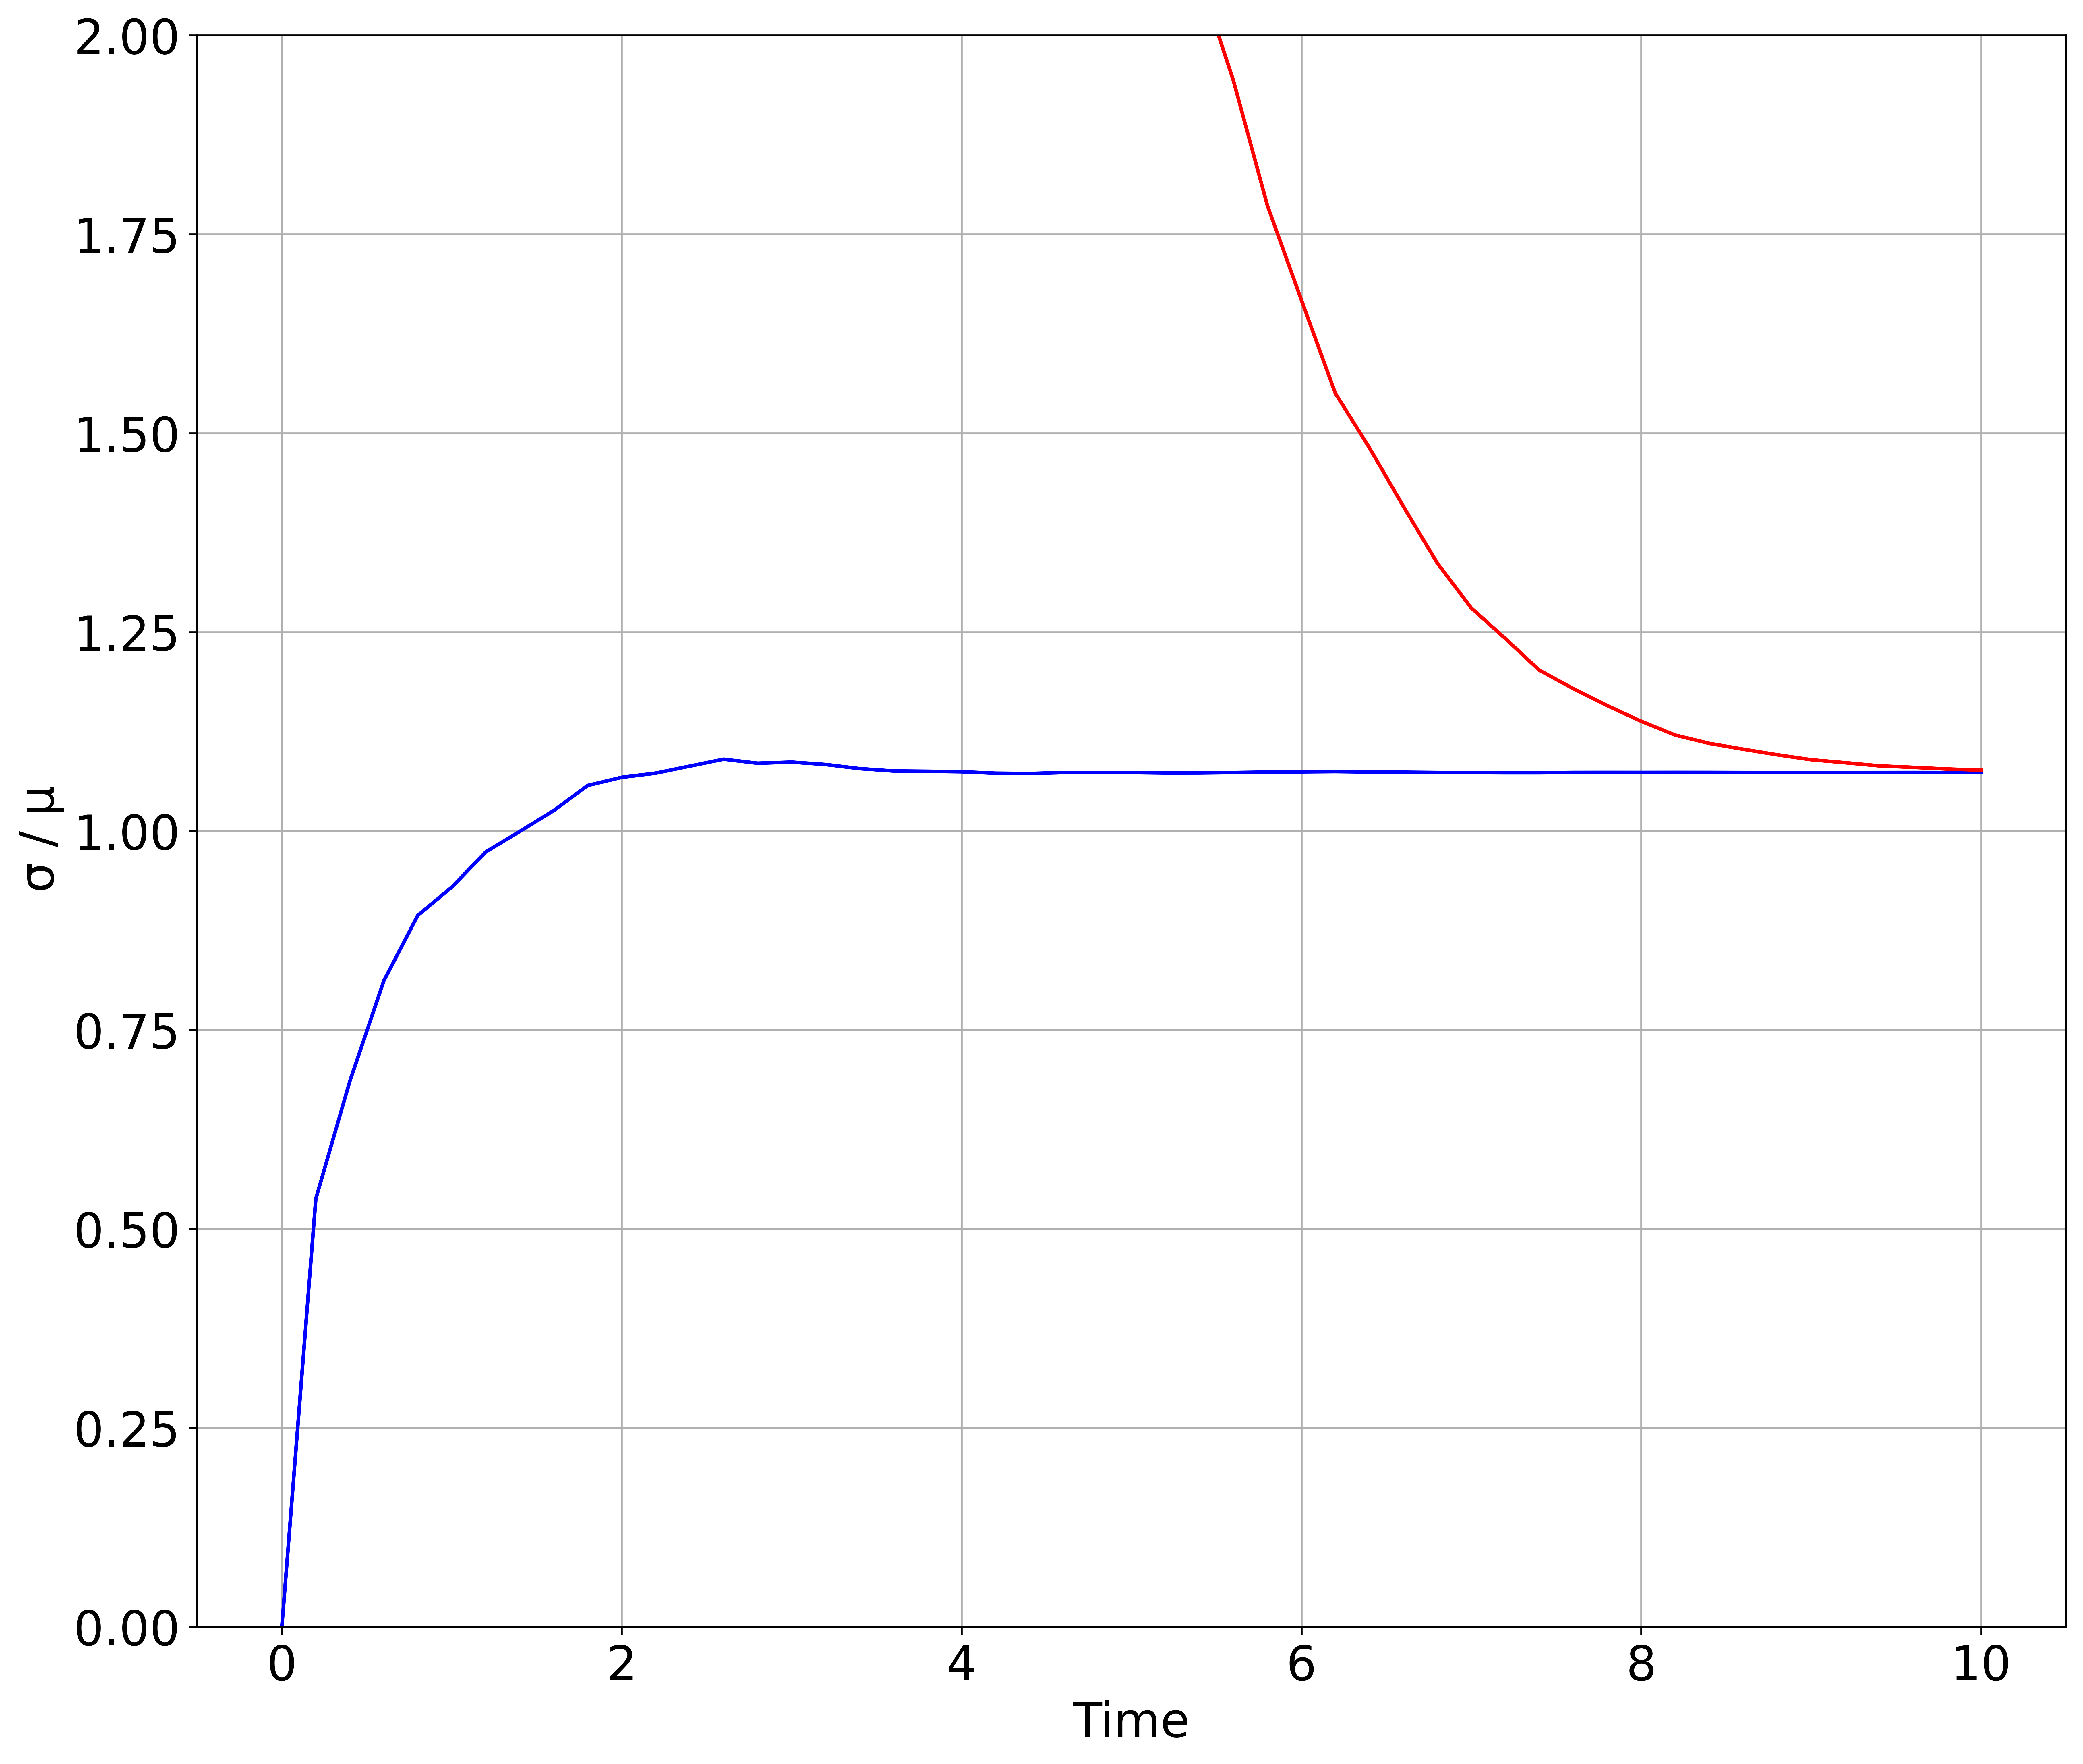

In [12]:
figure(figsize=(14, 12), dpi=600)
plt.plot(results_avg['time'],np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus']), color = 'blue', label = 'z_minus')
plt.plot(results_avg['time'],np.array(results_stddev['z_plus'])/np.array(results_avg['z_plus']), color = 'red', label = 'z_plus')
#plt.title('stddev/avg - 1.5_1.2_0.001_0.01')
plt.tick_params(labelsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylim(0, 2)
plt.ylabel(u'\u03c3 / \u03bc ', fontsize=20)
#plt.legend()
plt.grid()

In [76]:
out

,time,z_minus,z_plus
60,6.0,9847.0,11.0
60,6.0,9847.0,11.0
60,6.0,12581.0,9.0
60,6.0,294.0,0.0
60,6.0,3987.0,3.0


In [176]:
df_avg = pd.DataFrame(results_avg.to_array()[0], columns=['time', 'z_minus', 'z_plus'])

In [177]:
df_avg.to_csv('./Gillespy2/1.2_1.5_0.01_0.001_8t_81p/simulations/switching_results_avg.csv')

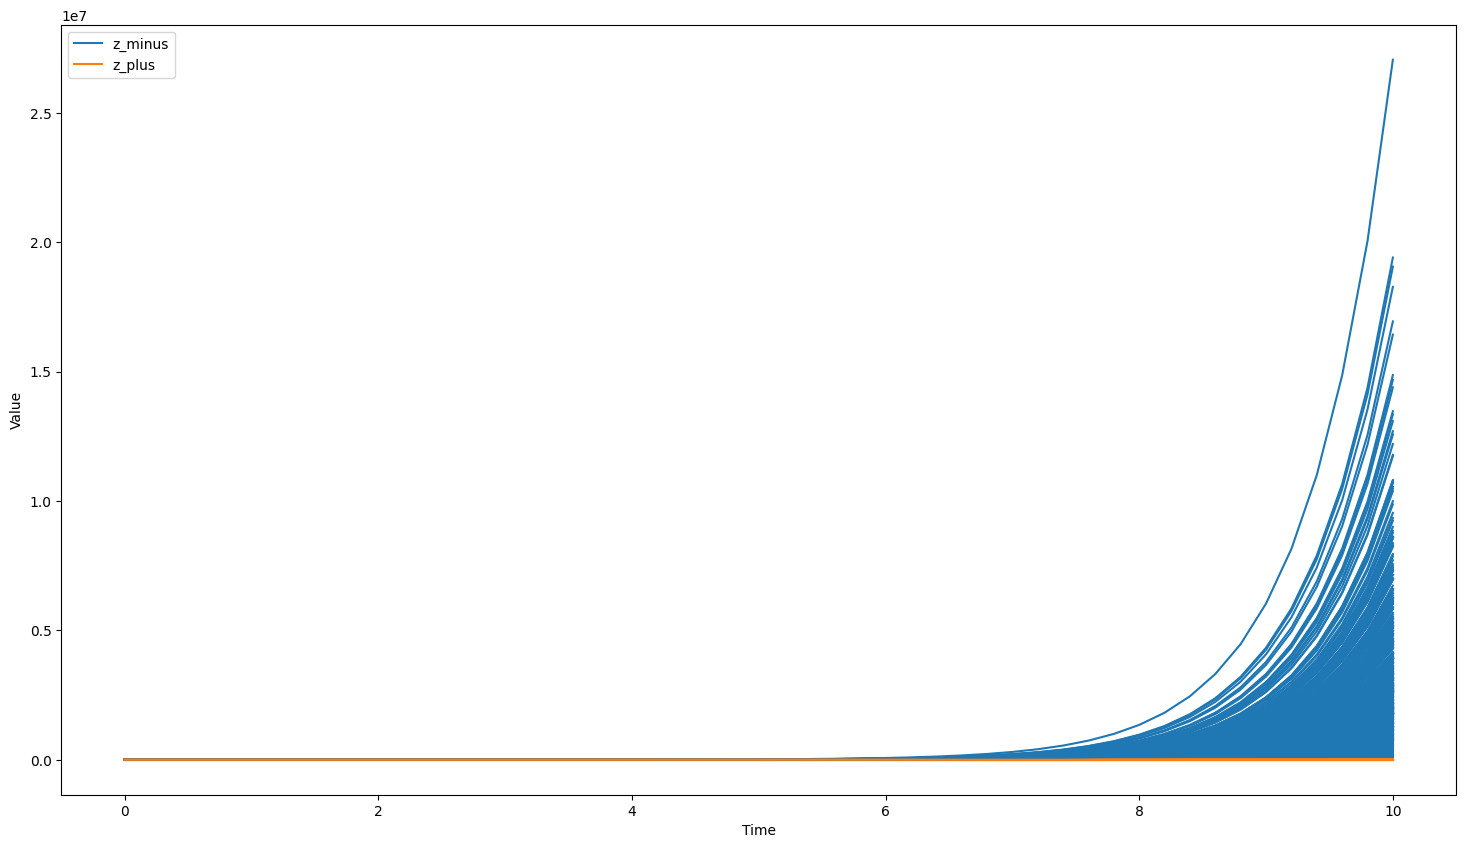

In [6]:
switching_results.plot()

In [ ]:
results_avg['z_minus'][-1], results_stddev['z_minus'][-1]

In [ ]:
print(results_stddev['z_minus'][-1] / results_avg['z_minus'][-1])
print(results_stddev['z_plus'][-1] / results_avg['z_plus'][-1])

# print(results_stddev1['z_minus'][-1] / results_avg1['z_minus'][-1])
# print(results_stddev1['z_plus'][-1] / results_avg1['z_plus'][-1])

# print(results_stddev2['z_minus'][-1] / results_avg2['z_minus'][-1])
# print(results_stddev2['z_plus'][-1] / results_avg2['z_plus'][-1])

In [ ]:
np.exp(.5 * 4),np.sqrt(np.exp(.5 * 4) * (np.exp(.5 * 4) - 1))

In [ ]:
plt.plot(results_avg['time'][30:],results_avg['z_minus'][30:], '-', color = 'blue',label = '0.005_0.015')
#plt.plot(results_avg['time'],results_avg['z_plus'], '-', color = 'blue', label = '0.005_0.015')
plt.fill_between(results_avg['time'][30:], np.array(results_avg['z_minus'][30:]) - np.array(results_stddev['z_minus'][30:]), np.array(results_avg['z_minus'][30:]) + np.array(results_stddev['z_minus'][30:]), color = 'blue', alpha = 0.2)
#plt.fill_between(results_avg['time'], np.array(results_avg['z_plus']) - np.array(results_stddev['z_plus']), np.array(results_avg['z_plus']) + np.array(results_stddev['z_plus']), color = 'blue', alpha = 0.2)

plt.plot(results_avg1['time'][30:],results_avg1['z_minus'][30:], '-', color = 'red',label = '0.01_0.01')
#plt.plot(results_avg1['time'],results_avg1['z_plus'], '-', color = 'red', label = '0.01_0.01')
plt.fill_between(results_avg1['time'][30:], np.array(results_avg1['z_minus'][30:]) - np.array(results_stddev1['z_minus'][30:]), np.array(results_avg1['z_minus'][30:]) + np.array(results_stddev1['z_minus'][30:]), color = 'red', alpha = 0.2)
#plt.fill_between(results_avg1['time'], np.array(results_avg1['z_plus']) - np.array(results_stddev1['z_plus']), np.array(results_avg1['z_plus']) + np.array(results_stddev1['z_plus']), color = 'red', alpha = 0.2)

#plt.plot(results_avg2['time'][30:],results_avg2['z_minus'][30:], '-', color = 'green')
#plt.plot(results_avg2['time'],results_avg2['z_plus'], '-', color = 'green')
#plt.fill_between(results_avg2['time'][30:], np.array(results_avg2['z_minus'][30:]) - np.array(results_stddev2['z_minus'][30:]), np.array(results_avg2['z_minus'][30:]) + np.array(results_stddev2['z_minus'][30:]), color = 'green', alpha = 0.2)
#plt.fill_between(results_avg2['time'], np.array(results_avg2['z_plus']) - np.array(results_stddev2['z_plus']), np.array(results_avg2['z_plus']) + np.array(results_stddev2['z_plus']), color = 'green', alpha = 0.2)

plt.title('Z-(t)')
plt.legend()

In [ ]:
print(results_stddev['z_minus'])
print(results_avg['z_minus'])
np.array(results_stddev['z_minus'])/np.array(results_avg['z_minus'])

In [ ]:
results_avg.plot()

In [ ]:
switching_results[0]

In [ ]:
results_avg.to_array()

In [ ]:
fig,axs = plt.subplots(1,5, figsize=(15,4))
for i in range(0,5):
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_minus'], 'r')
        axs[i].plot(switching_results[i]['time'], switching_results[i]['z_plus'], 'b')
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [ ]:
fig,axs = plt.subplots(2,5, figsize=(15,6))
for j in range(0,2):
    for i in range(0,5):
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_minus'], 'r')
        axs[j,i].plot(switching_results[5*j+i]['time'], switching_results[i+j*5]['z_plus'], 'b')
        #axs[j,i].set_ylim(0,2e8)
        #axs[i,j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
fig.tight_layout() 

In [10]:
def total_size(paramateres_value=None):
    model = gillespy2.Model(name="switching_process")
    # Parameters
    alpha_minus = gillespy2.Parameter(name='alpha_minus', expression=1.0)
    beta_minus = gillespy2.Parameter(name='beta_minus', expression=0.0)
    alpha_plus = gillespy2.Parameter(name='alpha_plus', expression=1.5)
    beta_plus = gillespy2.Parameter(name='beta_plus', expression=0.0)
    switch_minus = gillespy2.Parameter(name='switch_minus', expression=0.001)
    switch_plus = gillespy2.Parameter(name='switch_plus', expression=0.01)
    model.add_parameter([alpha_minus, beta_minus, alpha_plus, beta_plus, switch_minus, switch_plus])
    # Species
    z = gillespy2.Species(name='z_minus', initial_value=1)
    model.add_species([z])
    # Reactions
    birth_minus = gillespy2.Reaction(name="birth_minus", reactants={z: 1}, products={z: 2}, rate=alpha_minus) 
    death_minus = gillespy2.Reaction(name="death_minus", reactants={z: 1}, products={}, rate=beta_minus)
    birth_plus = gillespy2.Reaction(name="birth_plus", reactants={z: 1}, products={z: 2}, rate=alpha_plus) 
    death_plus = gillespy2.Reaction(name="death_plus", reactants={z: 1}, products={}, rate=beta_plus)
    switch_to_minus = gillespy2.Reaction(name="switch_to_minus", reactants={z: 1}, products={z: 2}, rate=switch_minus)
    switch_to_plus = gillespy2.Reaction(name="switch_to_plus", reactants={z: 1}, products={z: 2}, rate=switch_plus)
    model.add_reaction([birth_minus, death_minus, birth_plus, death_plus, switch_to_minus, switch_to_plus])
    # Timespan
    tspan = gillespy2.TimeSpan.linspace(t=8.0, num_points=81)
    model.timespan(tspan)
    return model

In [11]:
switching_model = total_size()

In [12]:
%time switching_results= switching_model.run(number_of_trajectories=500)

Exception in thread Thread-11 (read):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gillespy2/solvers/cpp/c_decoder.py", line 244, in read
    line = output.read(page_size).decode("ascii")
           ^^^^^^^^^^^^^^^^^^^^^^
ValueError: PyMemoryView_FromBuffer(): info->buf must not be NULL


CPU times: user 1.39 s, sys: 529 ms, total: 1.92 s
Wall time: 19h 39min 58s
